# Image Classification using CNN

## **1. Introduction**

### Image Classification using Transfer Learning (ResNet50)

This notebook builds an image classifier using **Transfer Learning with ResNet50** to classify images of cats, dogs, and pandas. The dataset consists of three folders: `cats`, `dogs`, and `panda`, each containing images of different dimensions.

### **2. Importing Required Libraries**

In [44]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.image import imread
from tensorflow.keras.applications import ResNet50

## **3. Data Exploration (EDA)**
Before training our model, we explore the dataset to get insights into its structure and distribution.

In [45]:
# Set dataset path
DATASET_PATH = "/Users/arturocasasa/DATASET"

In [46]:
# List categories
categories = os.listdir(DATASET_PATH)
categories = [d for d in os.listdir(DATASET_PATH) if not d.startswith('.')]
print("Classes:", categories)

Classes: ['dogs', 'cats', 'panda']


In [47]:
# Check image sizes before resizing
image_sizes = []
for category in categories:
    category_path = os.path.join(DATASET_PATH, category)
    sample_image = random.choice(os.listdir(category_path))
    img = imread(os.path.join(category_path, sample_image))
    image_sizes.append(img.shape)

In [48]:
# Display unique image sizes
print("Sample image sizes:", image_sizes[:5])  # Display first 5 images' dimensions
print("Classes:", categories)

Sample image sizes: [(261, 350, 3), (199, 185, 3), (375, 500, 3)]
Classes: ['dogs', 'cats', 'panda']


In [49]:
# Count number of images per category
for category in categories:
    category_path = os.path.join(DATASET_PATH, category)
    num_images = len(os.listdir(category_path))
    print(f"{category}: {num_images} images")

dogs: 1000 images
cats: 1000 images
panda: 1000 images


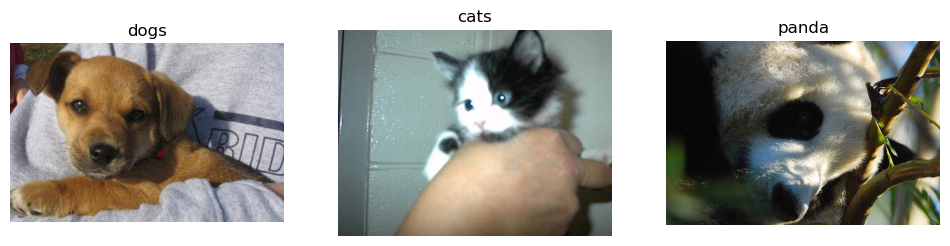

In [50]:
# Display sample images
from matplotlib.image import imread
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, category in enumerate(categories):
    category_path = os.path.join(DATASET_PATH, category)
    sample_image = random.choice(os.listdir(category_path))
    img = imread(os.path.join(category_path, sample_image))
    
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')
plt.show()



## **4. Data Preprocessing & Augmentation**
We preprocess and augment the dataset to improve model generalization.

In [51]:
# Set image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20

In [52]:
# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,    # Normalize pixel values
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shearing transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images
    validation_split=0.2  # Split data into training and validation sets
)


In [53]:
# Load training data
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 2400 images belonging to 3 classes.


In [54]:
# Load validation data
val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 600 images belonging to 3 classes.


## **5. Building the CNN Model**
We define a CNN model using **ResNet50** as the base model to improve classification accuracy.

In [55]:
from tensorflow.keras.applications import ResNet50

In [56]:
# Load ResNet50 model without the top classification layer

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Unfreeze the last 10 layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True  # Freeze base model layers

In [57]:
# Define new model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(3, activation='softmax')  # 3 output classes (cats, dogs, pandas)
])

In [58]:
# Compile Model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## **6. Training the Model**
We train the model using the prepared dataset.

In [59]:
# Train Model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)


Epoch 1/20
75/75 [==============================] - 128s 2s/step - loss: 0.2292 - accuracy: 0.9050 - val_loss: 1.2021 - val_accuracy: 0.3333
Epoch 2/20
75/75 [==============================] - 128s 2s/step - loss: 0.0700 - accuracy: 0.9733 - val_loss: 1.2658 - val_accuracy: 0.3400
Epoch 3/20
75/75 [==============================] - 129s 2s/step - loss: 0.0535 - accuracy: 0.9829 - val_loss: 1.2149 - val_accuracy: 0.3333
Epoch 4/20
75/75 [==============================] - 127s 2s/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 1.1039 - val_accuracy: 0.3433
Epoch 5/20
75/75 [==============================] - 128s 2s/step - loss: 0.0311 - accuracy: 0.9917 - val_loss: 1.1347 - val_accuracy: 0.3700
Epoch 6/20
75/75 [==============================] - 128s 2s/step - loss: 0.0307 - accuracy: 0.9917 - val_loss: 1.4848 - val_accuracy: 0.3617
Epoch 7/20
75/75 [==============================] - 128s 2s/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 1.1976 - val_accuracy: 0.3417
Epoch 8/20
75

## **7. Evaluating Model Performance**
We analyze the model's performance by plotting accuracy and loss curves and printing the final accuracy values.

In [70]:
# Plot Accuracy and Loss Curves
def plot_history(history):
    plt.figure(figsize=(24, 8))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')
    
    plt.show()


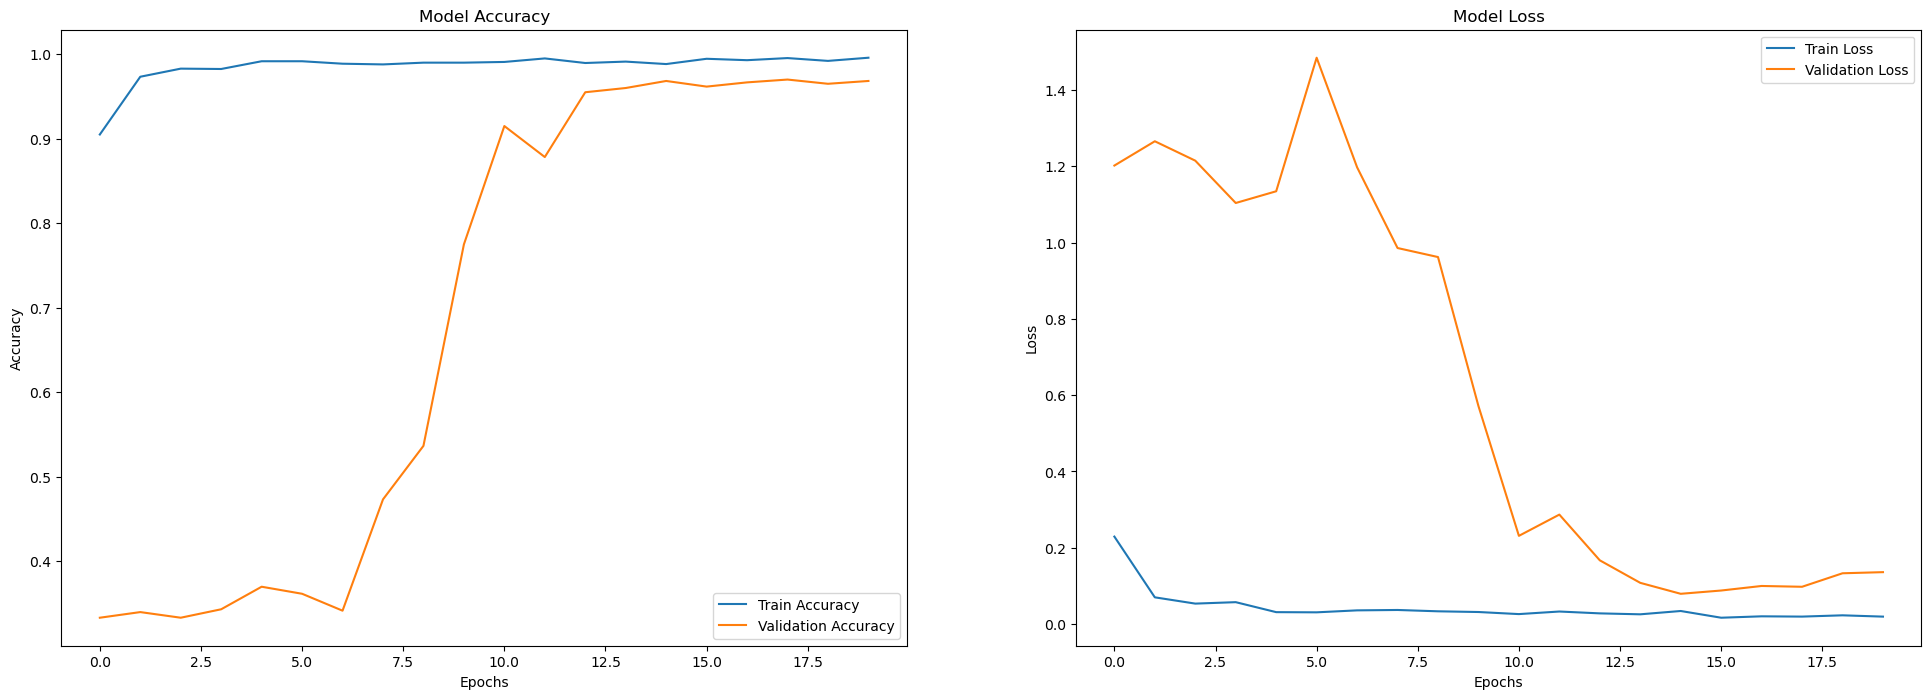

In [71]:
plot_history(history)

In [72]:
# Display final accuracy values
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9958
Final Validation Accuracy: 0.9683



## **8. Conclusions**
Using **ResNet50 for Transfer Learning**, model achieved higher accuracy compared to training a CNN from scratch. Key takeaways:
- **Transfer learning significantly improves feature extraction**, leveraging pre-trained weights.
- **Training accuracy and validation accuracy trends**: If validation accuracy closely matches training accuracy, the model generalizes well. A large gap indicates overfitting.
- **Loss curve analysis**: A decreasing loss suggests effective learning. If validation loss increases, we may need to adjust dropout or add data augmentation.

### **Potential Improvements:**
1. **Fine-Tune ResNet50**: Unfreeze later layers and retrain with a lower learning rate.
2. **Use a more powerful pre-trained model**: Try EfficientNet or ResNet101.
3. **Increase Dataset Size**: More diverse images improve generalization.

This model provides a strong baseline, but further tuning and enhancements can improve performance.
